# 1. Data Loading

In [2]:
import numpy as np
import pandas as pd 
import os
df = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/train_data.csv")
df_test = pd.read_csv("/kaggle/input/engage-2-value-from-clicks-to-conversions/test_data.csv")


* The train data has been loaded in the variable "df"
* The test data has been loaded in the variable "df_test"

# 2. Exploratory Data Analysis

In [3]:
print(df.shape, df_test.shape)
print(round(df_test.shape[0]/df.shape[0]*100, 1),'%')
print(df['purchaseValue'].head(10))

(116023, 52) (29006, 51)
25.0 %
0           0.0
1           0.0
2           0.0
3           0.0
4    88950000.0
5    28000000.0
6    80510000.0
7           0.0
8           0.0
9           0.0
Name: purchaseValue, dtype: float64


* The test data is 25 % of the training data, a train test split ratio of 0.25 (test size) can be used
* The data contains "purchase value" for the purchases that have been made and a "no purchase" indicated by 0.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116023 entries, 0 to 116022
Data columns (total 52 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   trafficSource.isTrueDirect                    42890 non-null   object 
 1   purchaseValue                                 116023 non-null  float64
 2   browser                                       116023 non-null  object 
 3   device.screenResolution                       116023 non-null  object 
 4   trafficSource.adContent                       2963 non-null    object 
 5   trafficSource.keyword                         44162 non-null   object 
 6   screenSize                                    116023 non-null  object 
 7   geoCluster                                    116023 non-null  object 
 8   trafficSource.adwordsClickInfo.slot           4281 non-null    object 
 9   device.mobileDeviceBranding                   11

* There are more categorical columns than numerical, the target variable does not have any null values, but null values are present in some of the features.

In [5]:
((df["purchaseValue"]==0).sum())/len(df["purchaseValue"])*100

79.32737474466269

* About 79.3% entries in the dataset correspond to no purchase.
* Since it is like that it can be a classification cum regression approach, where whether the digital behaviour is going to be a purchase or not can be predicted by classification and incase of a purchase, the purchase value can be predicted through regression

(23985, 52)


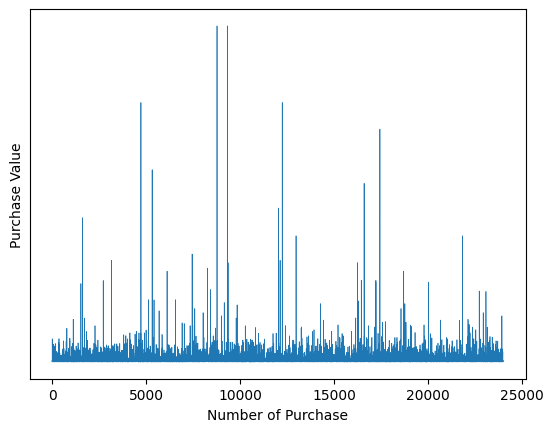

In [6]:
xf=df[df['purchaseValue']>0]
print(xf.shape)
import matplotlib.pyplot as plt
plot=range(len(xf))
fig, ax = plt.subplots()
ax.plot(plot, xf['purchaseValue'], linewidth=0.5)
ax.set_xlabel('Number of Purchase')
ax.set_ylabel('Purchase Value')
ax.set_yticks([])
ax.set_yticklabels([])
plt.show()

* It looks like the target variable has some outliers and also may be skewed

In [7]:
xf['purchaseValue'].skew()

26.369475671210807

* The target is highly skewed since the skewness value is > 1

In [8]:
q1 = xf['purchaseValue'].quantile(0.25)
q3 = xf['purchaseValue'].quantile(0.75)
iqr = q3 - q1
low = q1 - 1.5 * iqr
up = q3 + 1.5 * iqr
outliers = xf[(xf['purchaseValue'] < low) | (xf['purchaseValue'] > up)]
print(round(len(outliers)/len(xf)*100, 2), '%')

11.86 %


* There is around 12 % outliers in the target variable

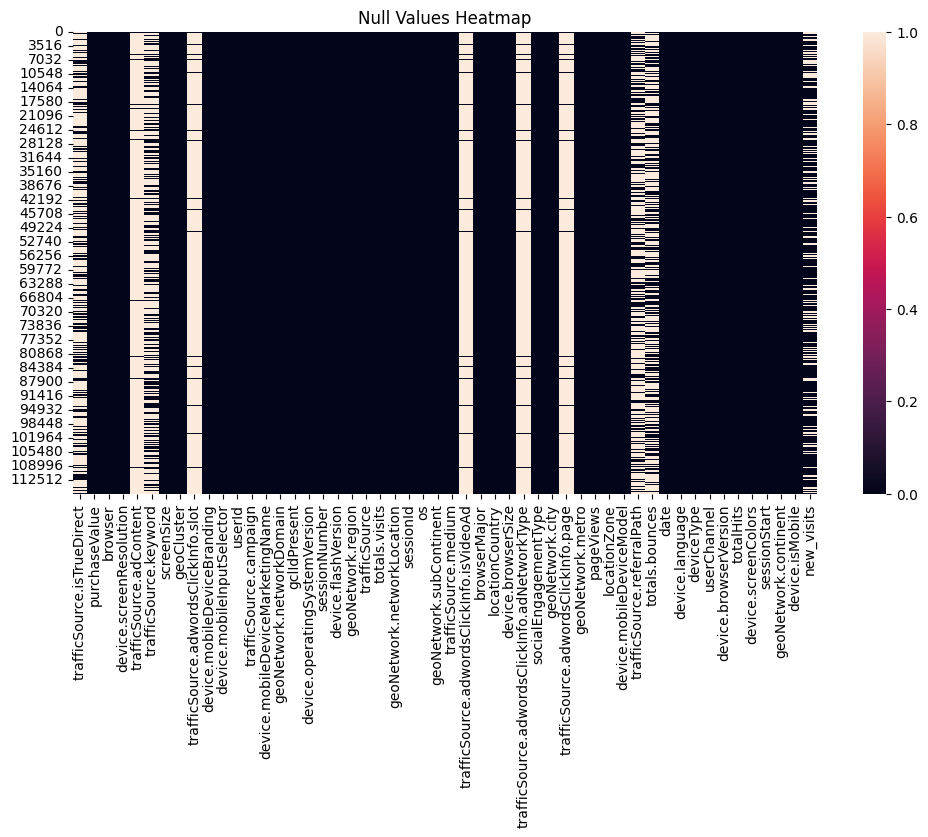

In [9]:
nc = df.select_dtypes(include=['number']).columns.tolist()
cc = df.select_dtypes(include=['object']).columns.tolist()
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull())
plt.title('Null Values Heatmap')
plt.show()

* The heat map gives insight that **null values are present** in some of the features.
* Among the 51 features, **10 features** (20%) have **null values** 
* There are about **5 features** (10%) which have a very ****high percentage of null** values**

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


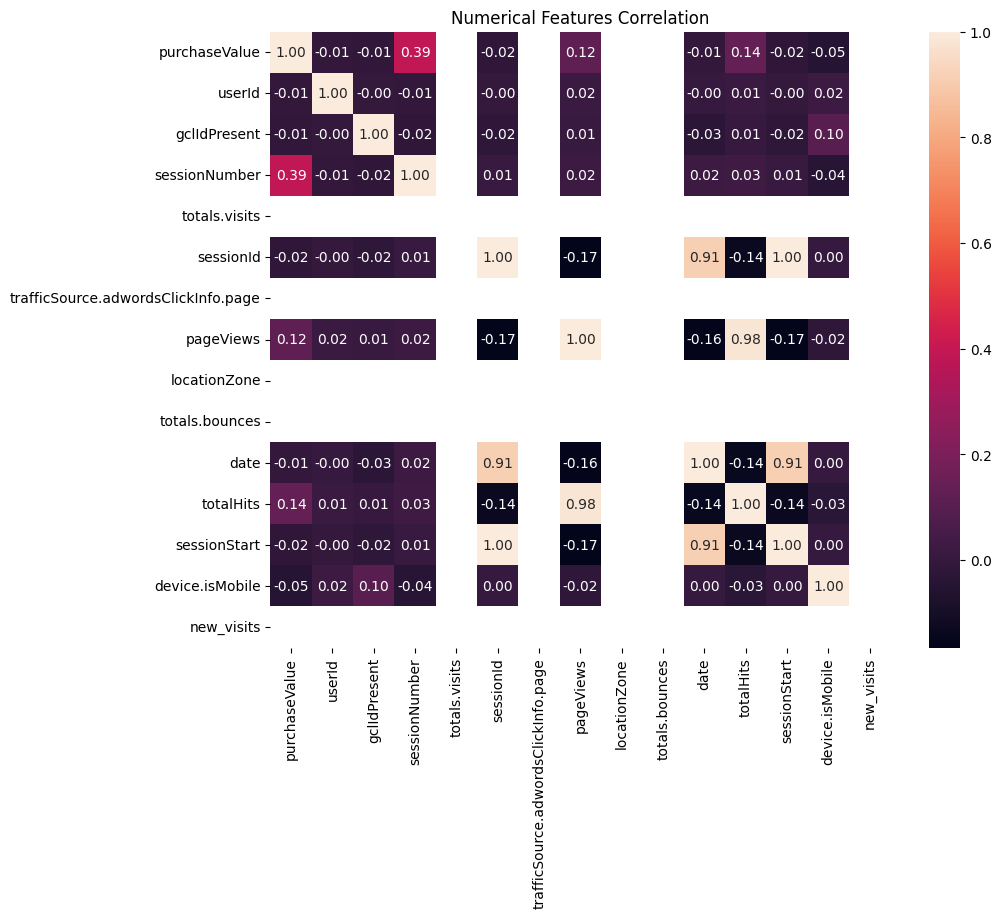

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(xf.corr(numeric_only=True), annot=True, fmt=".2f")
plt.title('Numerical Features Correlation')
plt.show()

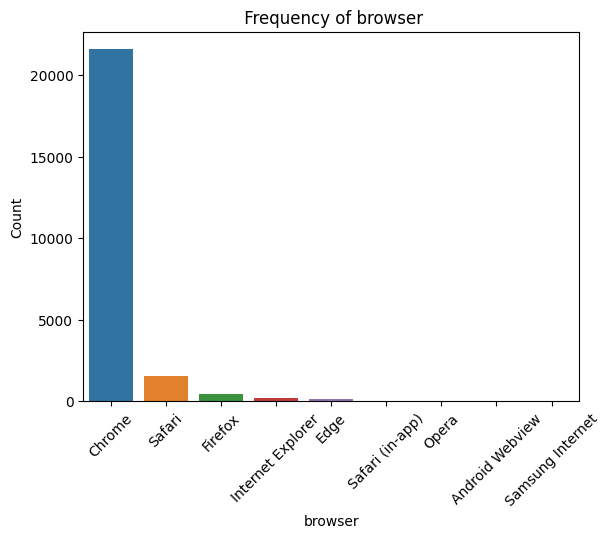

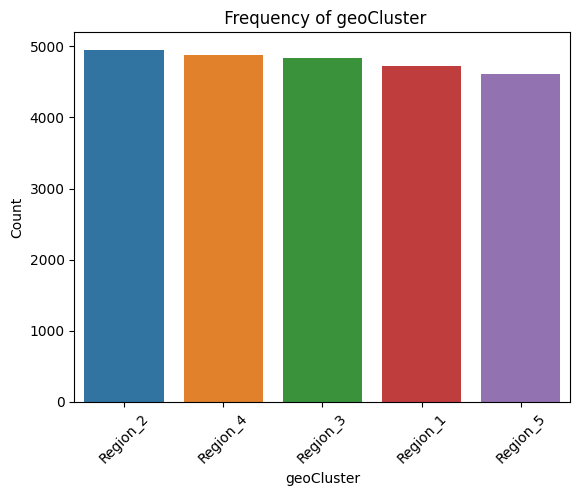

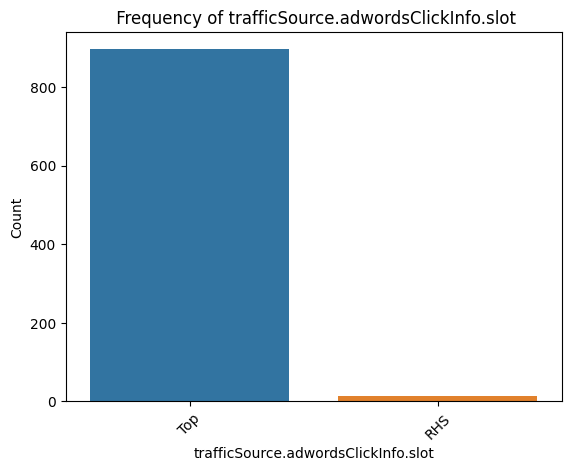

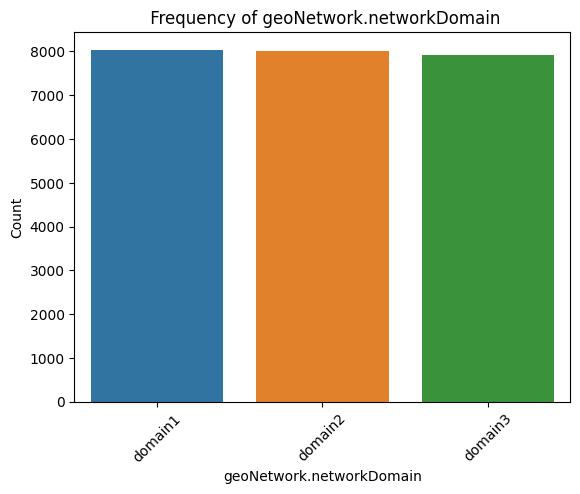

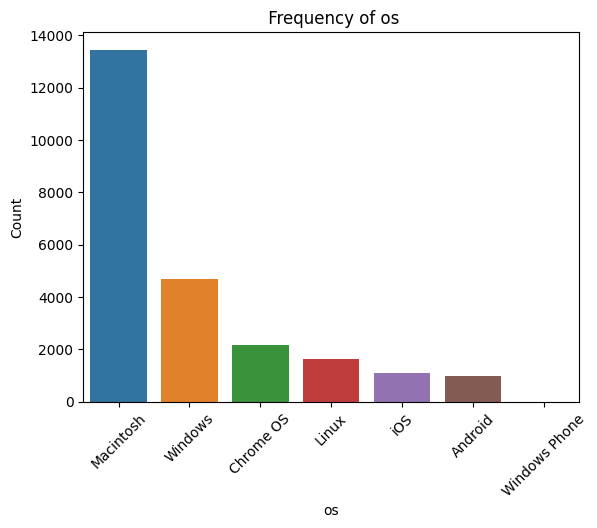

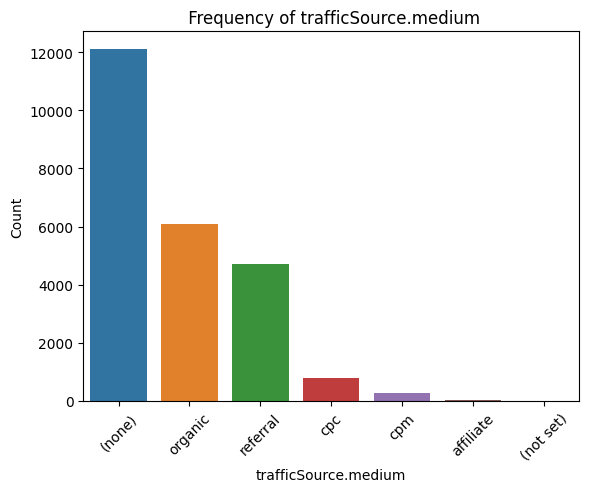

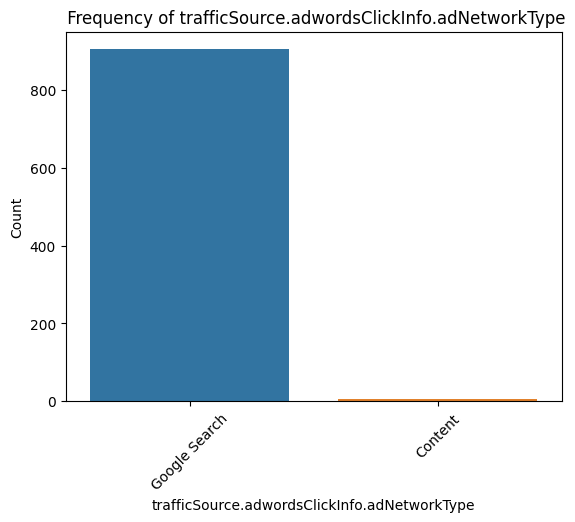

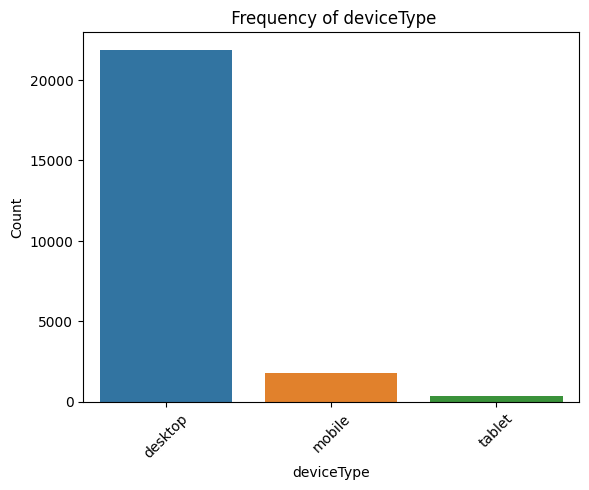

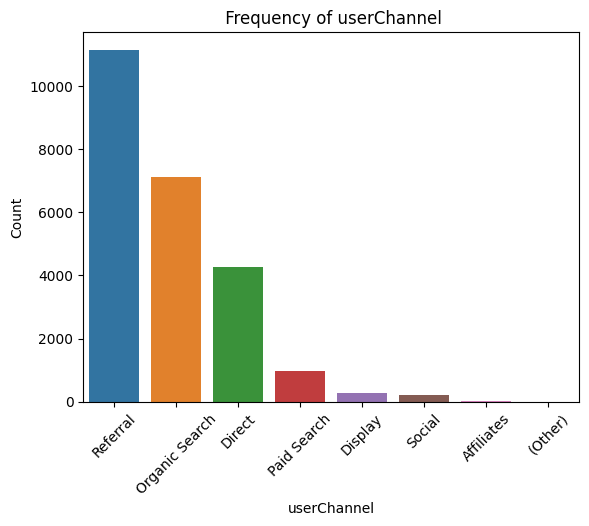

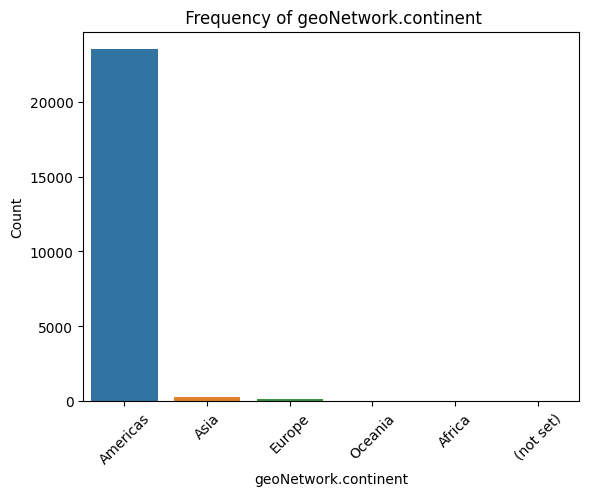

In [13]:
for a in cc:
    if xf[a].nunique() < 10 and xf[a].nunique() > 1 :
        sns.barplot(x = xf[a].value_counts().index, y = xf[a].value_counts().values)
        plt.title(f' Frequency of {a}')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

In [14]:
print((xf['geoNetwork.continent']=="Americas").sum())
xf.shape
print(23511/23985*100)
df.shape
print((df['geoNetwork.continent']=="Americas").sum())

23511
98.02376485303314
69856


* Most of the purchases have been made from Americas

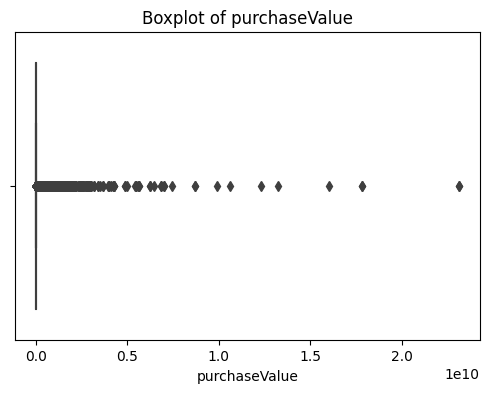

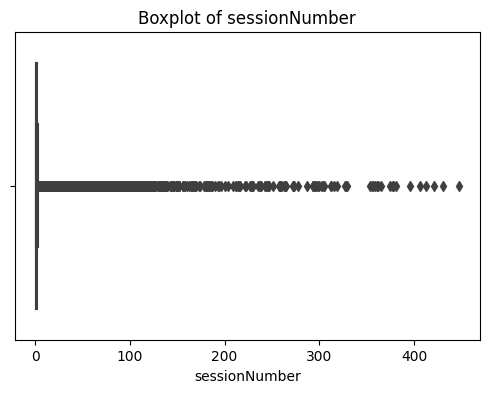

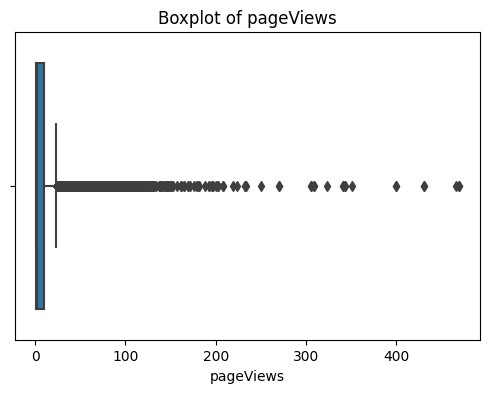

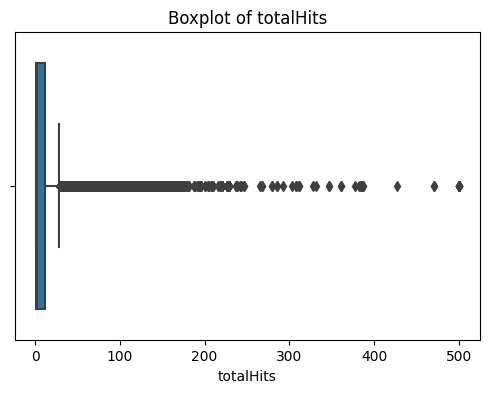

In [15]:
for a in ['purchaseValue', 'sessionNumber', 'pageViews', 'totalHits']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[a])
    plt.title(f'Boxplot of {a}')
    plt.show()

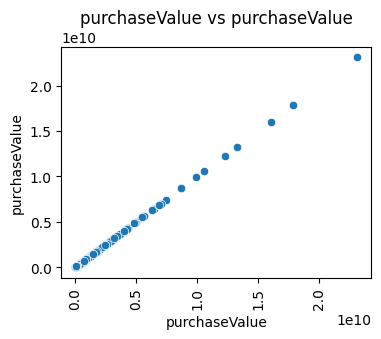

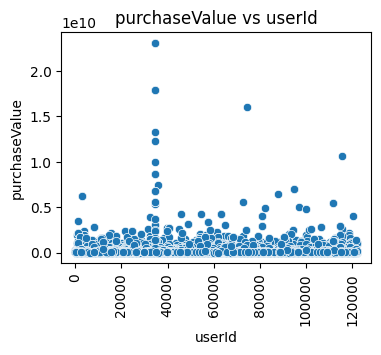

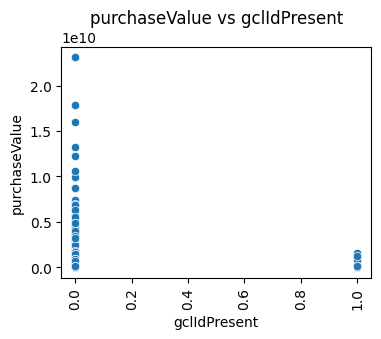

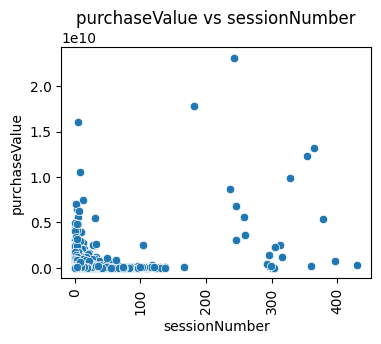

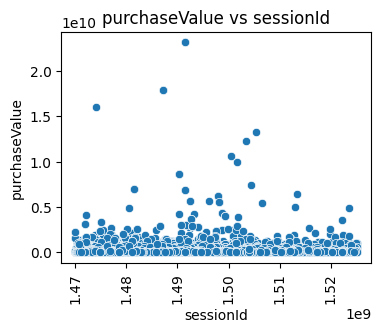

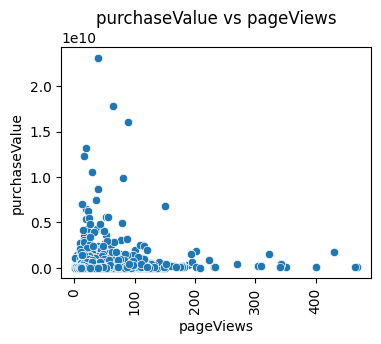

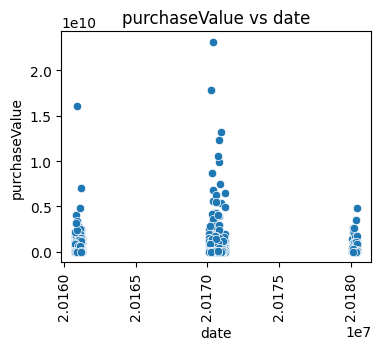

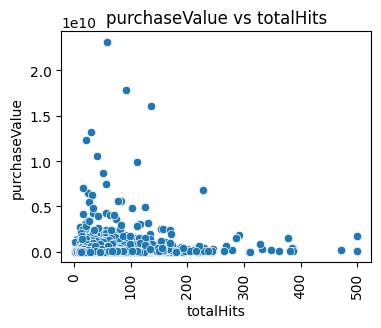

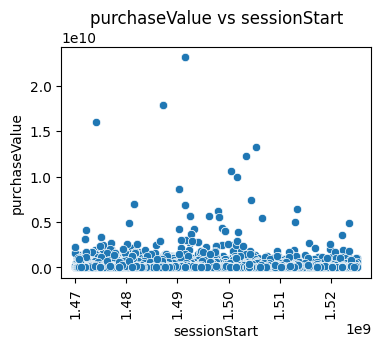

In [16]:
for a in nc:
    if xf[a].nunique() > 1:
        plt.figure(figsize=(4, 3))
        sns.scatterplot(x=a, y=xf['purchaseValue'], data=xf)
        plt.title(f'purchaseValue vs {a}')
        plt.xticks(rotation=90)  
        plt.show()

In [17]:
null = []
for x in df.columns:
   nullvalue = df[x].isnull().mean() * 100
   uniquevalue = df[x].unique()
   dtype = df[x].dtype
   null.append({
       'Feature': x,
       'Null Percentage': round(nullvalue, 2),
       'Unique Values': uniquevalue[:3],
       'No. of Unique Values': len(uniquevalue),
       'Data Type': dtype
   })
null = pd.DataFrame(null).sort_values(by='Null Percentage', ascending=False)
null

,Feature,Null Percentage,Unique Values,No. of Unique Values,Data Type
4,trafficSource.adContent,97.45,"[nan, Google Merchandise Collection, Google Me...",54,object
27,trafficSource.adwordsClickInfo.isVideoAd,96.31,"[nan, False]",2,object
34,trafficSource.adwordsClickInfo.page,96.31,"[nan, 1.0, 2.0]",6,float64
31,trafficSource.adwordsClickInfo.adNetworkType,96.31,"[nan, Google Search, Content]",3,object
8,trafficSource.adwordsClickInfo.slot,96.31,"[nan, Top, RHS]",4,object
39,trafficSource.referralPath,63.18,"[/intl/hr/yt/about/, nan, /yt/about/ja/]",942,object
0,trafficSource.isTrueDirect,63.03,"[nan, True]",2,object
5,trafficSource.keyword,61.94,"[nan, (not provided), google black women t shirt]",567,object
40,totals.bounces,59.36,"[1.0, nan]",2,float64
51,new_visits,30.60,"[1.0, nan]",2,float64


* Features with **"not available in demo dataset" can be removed** as they do not provide valuable information
* Numeric columns with null values and one unique value except Nan should not be imputed with either mean, median or mode as it would make the feature to have only 1 unique value
* The target does not contain any null values

# 3. Feature Selection 

In [18]:
x = df.drop(columns=['purchaseValue'])
y = df['purchaseValue']
dropcolumn = [a for a in x.columns if x[a].nunique() == 1 and x[a].isnull().sum() == 0]
x = x.drop(columns=dropcolumn)

# 4. Train Test Split for Classification

In [19]:
yc = pd.Series(np.where(df['purchaseValue'] > 0, 1, 0), name='purchaseValue')
from sklearn.model_selection import train_test_split
x_train_classification, x_test_classification, y_train_classification, y_test_classification = train_test_split(x, yc,test_size = 0.25,
                                                                 random_state=42, stratify=yc)

* The train test split is done using a transformed target variable for classification and stratify is used for uniform splitting as one class would dominate the other.

# 5. Data Preprocessing

In [20]:
ccol = x.select_dtypes(include='object').columns.tolist()
ncol = x.select_dtypes(include=np.number).columns.tolist()
x[ccol] = x[ccol].astype(str)
lowccol = [c for c in ccol if x[c].nunique() <= 10]
highccol = [c for c in ccol if x[c].nunique() > 10]

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from category_encoders import CountEncoder, TargetEncoder
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder, RobustScaler

In [22]:
npipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant')),
    ('scaler', RobustScaler())
])
lowcpipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))   
])
highcpipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])
preprocessor = ColumnTransformer([
    ('numerical', npipe, ncol),
    ('lowcardcat', lowcpipe, lowccol),
    ('highcardcat', highcpipe, highccol)
])
x_train_classification[ccol] = x_train_classification[ccol].astype(str)
x_train_classification = preprocessor.fit_transform(x_train_classification, y_train_classification)
x_test_classification = preprocessor.transform(x_test_classification)


* A pipeline is made for easier automation of tasks on the test data.
* Simple imputer is used to impute constant value.
* Robust scaler is used on numerical features since they contain outliers.
* One hot encoder is used for categorical features with less than 11 unique values as it does not impose a false sense of order to the categorical variables.
* Ordinal encoder is used for categorical features with more than 10 unique values to avoid dimensionality explosion.

# 6. Model Training for Classification

In [23]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.ensemble import VotingRegressor

In [25]:
classifier = {
    'SGD': SGDClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'XGB': XGBClassifier(random_state=42),
    'DT': DecisionTreeClassifier(random_state=42)
}

for name, model in classifier.items():
    model.fit(x_train_classification, y_train_classification)
    prediction1 = model.predict(x_train_classification)
    prediction2 = model.predict(x_test_classification)
    train = accuracy_score(y_train_classification, prediction1)
    test = accuracy_score(y_test_classification, prediction2)
    print(f"""Model : {name}
    Train score :{train:.4f}
    Test score :{test:.4f}""")

Model : SGD
    Train score :0.9351
    Test score :0.9378
Model : RandomForest
    Train score :1.0000
    Test score :0.9573
Model : KNN
    Train score :0.9505
    Test score :0.8657
Model : XGB
    Train score :0.9751
    Test score :0.9578
Model : DT
    Train score :1.0000
    Test score :0.9018


* RandomForest and XGB Classifiers has the highest accuracy

# 7. Train Test Split for Regression

In [26]:
xreg = x[yc == 1]
yreg = y[yc == 1]

x_train_regression, x_test_regression, y_train_regression, y_test_regression = train_test_split(xreg, yreg,
                                                                                                test_size=0.25,
                                                                                                random_state=42)

x_train_regression[ccol] = x_train_regression[ccol].astype(str)
x_train_regression = preprocessor.fit_transform(x_train_regression, y_train_regression)
x_test_regression = preprocessor.transform(x_test_regression)

# 8. Model Training for Regression

In [27]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor, StackingRegressor, VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

In [28]:
Regressor = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(random_state=42),
    "SGD": SGDRegressor(random_state=42),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "XGB": XGBRegressor(random_state=42),
}
for name, model in Regressor.items():
    model.fit(x_train_regression, y_train_regression)
    prediction1 = model.predict(x_train_regression)
    prediction2 = model.predict(x_test_regression)
    train = r2_score(y_train_regression, prediction1)
    test = r2_score(y_test_regression, prediction2)
    print(f"""Model : {name}
    Train score :{train:.4f}
    Test score :{test:.4f}""")

Model : LinearRegression
    Train score :0.1942
    Test score :0.1274
Model : Ridge
    Train score :0.1942
    Test score :0.1281
Model : SGD
    Train score :-8806160.7143
    Test score :-7104293.6542
Model : DecisionTree
    Train score :1.0000
    Test score :0.4199
Model : RandomForest
    Train score :0.9135
    Test score :0.6080
Model : GradientBoosting
    Train score :0.6239
    Test score :0.4523
Model : AdaBoost
    Train score :-6.2416
    Test score :-4.9416
Model : XGB
    Train score :0.8941
    Test score :0.6056


* Linear models do not perform well.
* Tree based model perform well as the relationship is not linear.

# 9. Hyperparameter Tuning

In [ ]:
xc = preprocessor.fit_transform(x, yc)
xr = xc[yc == 1]
yr = y[yc == 1]

from sklearn.model_selection import RandomizedSearchCV
param = {
    'n_estimators': [100, 200, 300], 
    'learning_rate': [0.15, 0.2, 0.25], 
    'gamma': [0, 0.1, 0.2], 
    'max_depth': [10, 12, 15, 20], 
    'min_child_weight': [0.2, 0.5, 0.7], 
    'subsample': [0.5, 0.7, 1.0], 
    'colsample_bytree': [0.7, 1.0],
    'reg_lambda': [1, 2, 3], 
    'reg_alpha': [0, 0.5, 1], 
    'num_parallel_tree': [1, 2, 3], 
    'refresh_leaf': [0, 1], 
    'colsample_bylevel': [0.7, 1.0], 
    'colsample_bynode': [0.7, 1.0], 
}
searchmodel = XGBRegressor(random_state=42)
search = RandomizedSearchCV(
    estimator=searchmodel,
    param_distributions=param,
    n_iter=100,  
    scoring='r2',
    cv=2,
    random_state=42,
    n_jobs=-1
)
search.fit(xr, yr)
print(search.best_params_,search.best_score_)

{'subsample': 0.7, 'reg_lambda': 3, 'reg_alpha': 0, 'refresh_leaf': 0, 'num_parallel_tree': 3, 'n_estimators': 300, 'min_child_weight': 0.2, 'max_depth': 20, 'learning_rate': 0.15, 'gamma': 0.2, 'colsample_bytree': 1.0, 'colsample_bynode': 0.7, 'colsample_bylevel': 1.0} 0.4497905191076774 

* RandomSearchCV is used to reduce computational expensiveness, but it can miss the best parameters. It finds a good set of hyperparameters faster when the parameters are many in number.

# 10. Tuned Regression Model Training

In [ ]:
df_test = df_test.drop(columns=dropcolumn)
df_test[ccol] = df_test[ccol].astype(str)
c = RandomForestClassifier(random_state=42).fit(xc, yc)

final_x_test_classification = preprocessor.transform(df_test)

final_y_test = c.predict(final_x_test_classification)
final_x_test_regression = final_x_test_classification[final_y_test == 1]

final_model = XGBRegressor(
    subsample=0.7,
    reg_lambda=3,
    reg_alpha=0,
    refresh_leaf=0,
    num_parallel_tree=3,
    n_estimators=300,
    min_child_weight=0.2,
    max_depth=20,
    learning_rate=0.15,
    gamma=0.2,
    colsample_bytree=1.0,
    colsample_bynode=0.7,
    colsample_bylevel=1.0,
    random_state=42
)

final_model.fit(xr,yr)
purchase = np.zeros(final_x_test_classification.shape[0])
purchase[final_y_test == 1] = final_model.predict(final_x_test_regression)

# 11. Submission File Creation

In [ ]:
submission = pd.DataFrame({
    'id': range(len(purchase)),
    'purchaseValue': purchase
})
submission.to_csv("submission.csv", index=False)
print("Done")